<a href="https://colab.research.google.com/github/Arshnoor7/Assignment-R-Programming/blob/main/Assignment_R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - R Programming:**

### Q1. Create a file that contains 1000 lines of random strings.

In [1]:
num_lines <- 1000
string_length <- 10

random_strings <- replicate(num_lines, paste(sample(letters, string_length, replace = TRUE), collapse = ""))

writeLines(random_strings, "random_strings.txt")


Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform
the following operations:

(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.

(ii) Replace all the NA values with the average of the column value.

(iii) Find the Pearson correlation among all the columns and plot heat map.

Also select those columns
having correlation <=0.7.

(iv) Normalize all the values in the dataset between 0 and 10.

(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

[1] "Number of rows with missing values: 51"
[1] "Columns with correlation <= 0.7: "


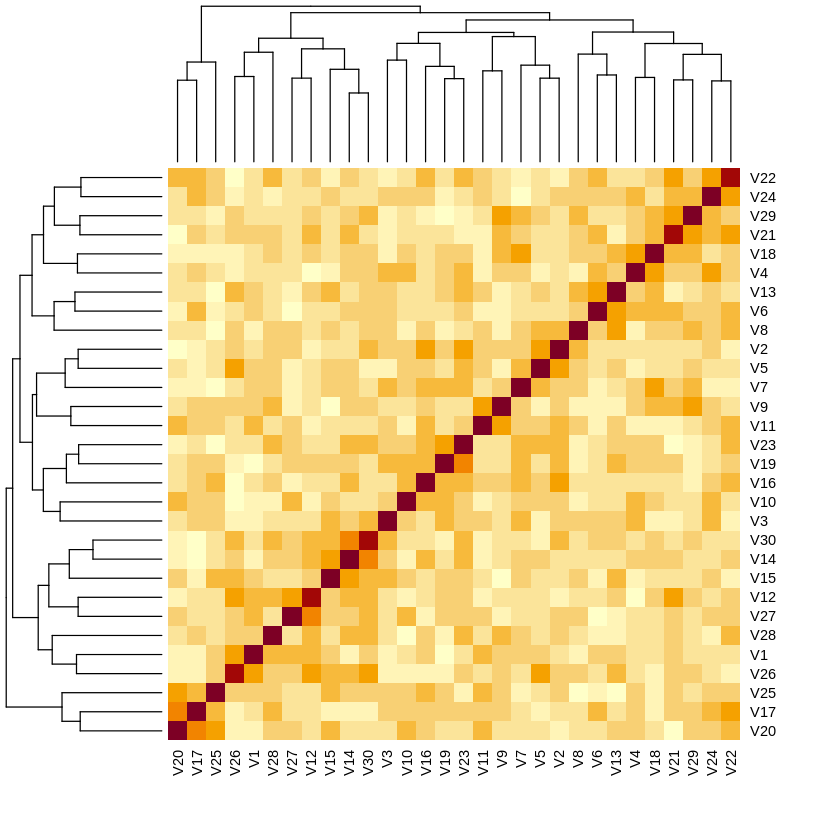

In [2]:
data <- matrix(runif(3000, min = 1, max = 200), nrow = 100)

data <- as.data.frame(data)

data[10:60, ] <- NA
missing_rows <- sum(rowSums(is.na(data)) > 0)
print(paste("Number of rows with missing values:", missing_rows))

data <- apply(data, 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))

cor_matrix <- cor(data)
heatmap(cor_matrix)

cor_threshold <- 0.7
selected_columns <- colnames(data)[colSums(cor_matrix <= cor_threshold) <= 0]
print(paste("Columns with correlation <= 0.7:", paste(selected_columns, collapse = ", ")))

data <- apply(data, 2, function(x) (x - min(x)) / (max(x) - min(x)) * 10)

data <- apply(data, 2, function(x) ifelse(x <= 0.5, 1, 0))


Q3. Create a random dataset of 500 rows and 10 columns.

Columns 1 to 4 are defined between [-10, 10];

Columns 5 to 8 are defined between [10, 20];

Columns 9 to 10 are defined between [-100, 100].

Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.

(i) K-Mean clustering

(ii) Hierarchical clustering

In [ ]:

data <- data.frame(
  column1 = runif(500, -10, 10),
  column2 = runif(500, -10, 10),
  column3 = runif(500, -10, 10),
  column4 = runif(500, -10, 10),
  column5 = runif(500, 10, 20),
  column6 = runif(500, 10, 20),
  column7 = runif(500, 10, 20),
  column8 = runif(500, 10, 20),
  column9 = runif(500, -100, 100),
  column10 = runif(500, -100, 100)
)

kmeans_data <- data[, 1:8]

kmeans_clusters <- kmeans(kmeans_data, centers = 10)
print(kmeans_clusters)

wss <- sapply(1:10, function(k) sum(kmeans_clusters$withinss[kmeans_clusters$cluster == k]))
plot(1:10, wss, type = "b", xlab = "Number of Clusters", ylab = "Within-Cluster Sum of Squares", main = "Elbow Method")

dist_matrix <- dist(data)
hierarchical_clusters <- hclust(dist_matrix)
plot(hierarchical_clusters, main = "Dendrogram")

plot(hierarchical_clusters, hang = -1, labels = FALSE)


Q4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].

Perform the following operations:

(i) Plot scatter graph between Column 5 and Column 6.

(ii) Plot histogram of each column in single graph.

(iii) Plot the Box plot of each column in single graph.

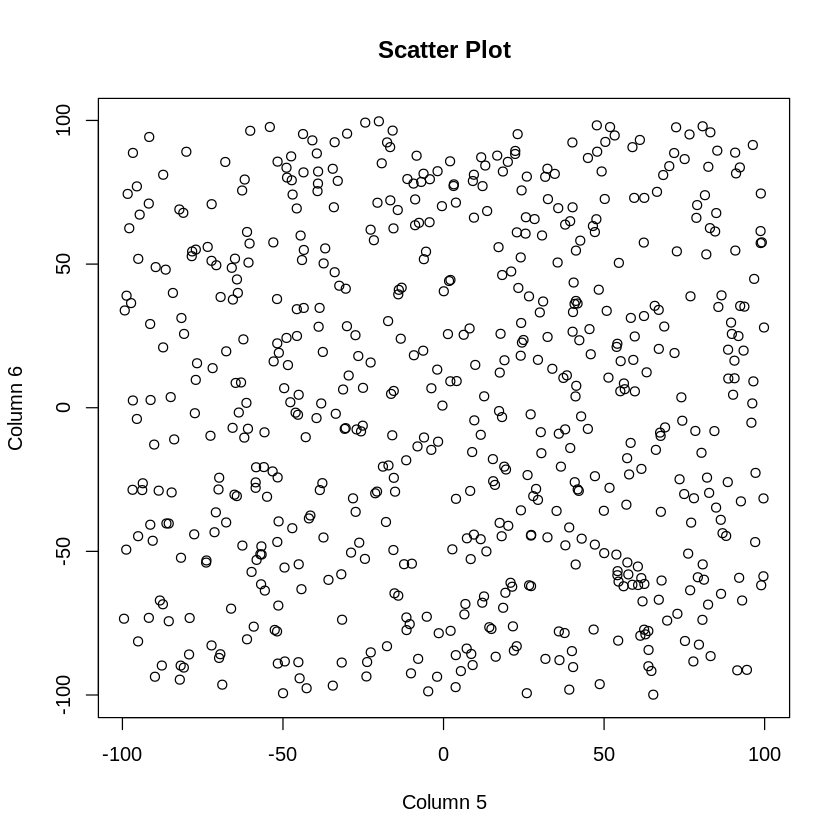

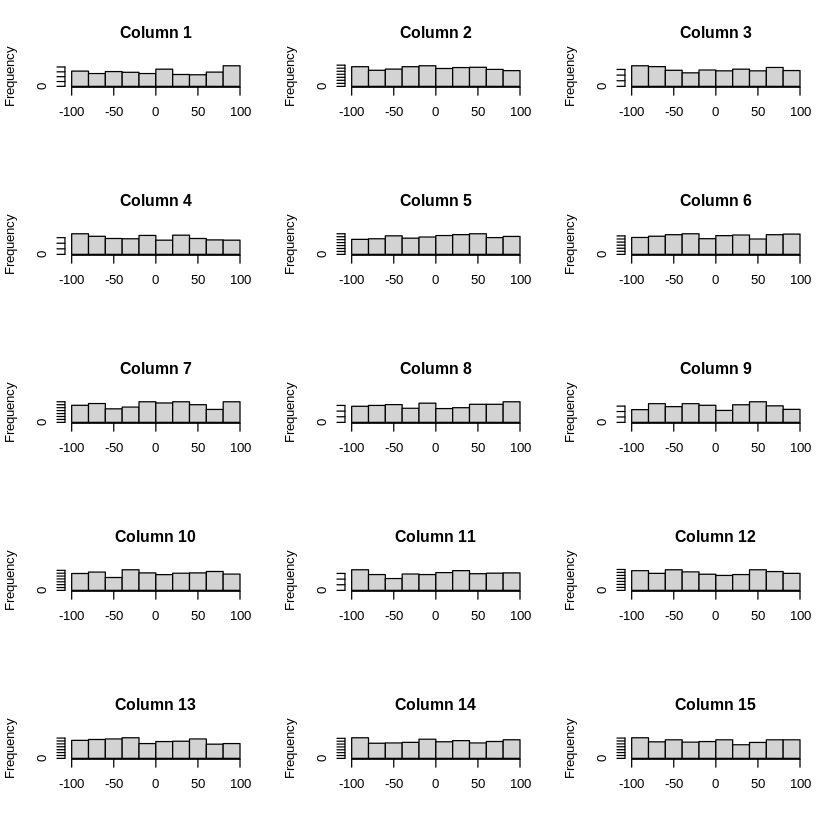

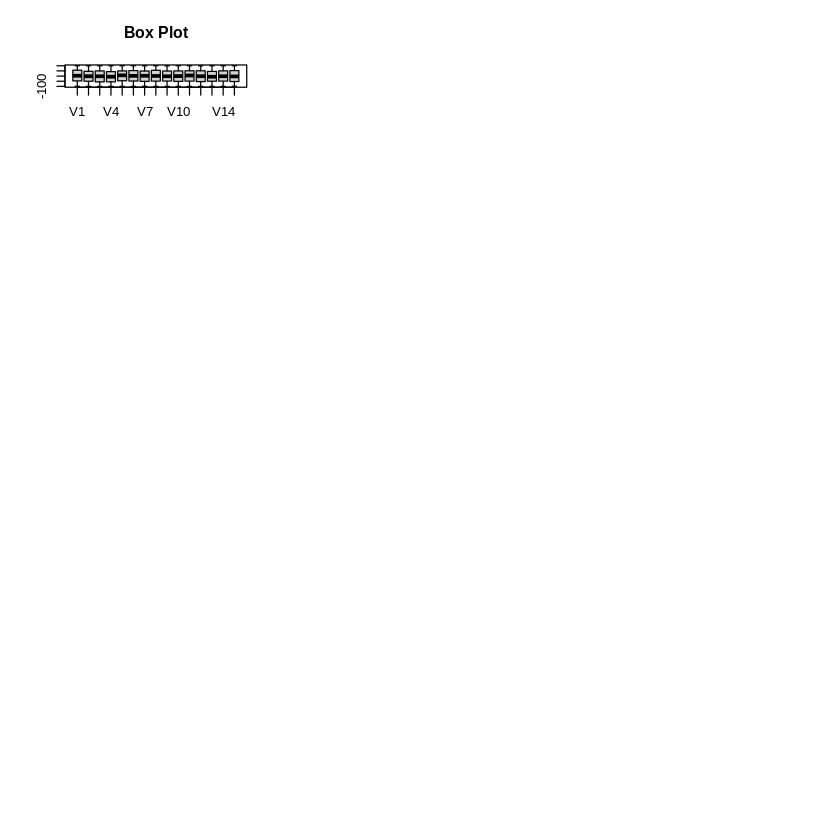

In [18]:

data <- matrix(runif(600*15, -100, 100), nrow = 600, ncol = 15)

df <- as.data.frame(data)

plot(df$V5, df$V6, xlab = "Column 5", ylab = "Column 6", main = "Scatter Plot")

par(mfrow = c(5, 3)) 
for (i in 1:15) {
  hist(df[, i], main = paste("Column", i), xlab = "", ylab = "Frequency")
}

boxplot(df, main = "Box Plot")



Q5. Create a random dataset of 500 rows and 5 columns:

All the values are defined between [5,10].

Perform the following operations:

(i) Perform t-Test on each column.

(ii) Perform Wilcoxon Signed Rank Test on each column.

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [ ]:

install.packages("stats")
library(stats)

data <- matrix(runif(2500, 5, 10), nrow = 500, ncol = 5)

colnames(data) <- paste0("Column", 1:5)

data <- as.data.frame(data)

t_test_results <- lapply(data, function(column) {
  t.test(column, mu = 7.5)
})
print(t_test_results)

wilcoxon_test_results <- lapply(data, function(column) {
  wilcox.test(column, mu = 7.5)
})
print(wilcoxon_test_results)

column3 <- data$Column3
column4 <- data$Column4

t_test_2samp <- t.test(column3, column4)
print(t_test_2samp)

wilcoxon_test_2samp <- wilcox.test(column3, column4)
print(wilcoxon_test_2samp)
